## ATU -Programming for Data Analysis, Winter 2023/24
## Project 1
##### Author: Norbert Antal

## **Analysis and simulation of Employee data based on real world data**

This project aims to investigate the variables, data distribution and relationships in a dataset based on real world data of at least 4 different variables and create a synthetic dataset that is simulating the same data as closely matching its properties as possible.

### Loading modules

Some essential Python libraries are required for this project; Pandas for data manipulation, Matplotlib and Seaborn for data visualisation and NumPy for numerical operations.

In [768]:
# loading required python modules
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Obtaining data

For sourcing real-world data, Kaggle.com was a valuable resource. Kaggle is a platform *"to learn data science and build a portfolio"*, providing access to large number of diverse datasets relevant to various domains.
The *Salary_Base_data* dataset was chosen as a sample because it covers a domain, employee data, that could prove valuable for examination, especially for those interested in contributing to future projects in the workplace, related to wages, bonus schemes, or other HR related topics. <br>The dataset is anonymised, both employee names and the company name or other specific details regarding the company are excluded from the dataset.

### Load and check data, initial overview

As we can't control the source file, to avoid possible issues with changing URLs or changes in the contents of the file, the dataset was manually downloaded in .csv format (*Salary_Data.csv*) and copied into the "Datasets" folder within the Projects root folder.

+ The salary dataset is read from the previously downloaded CSV file (*Salary_Data.csv*) into a Pandas DataFrame.<br>
  
+ After checking the datatypes, we find that the dataset contains three float64 or floating point type numeric variables and three object type variables which is indication that the data in those variables are either textual or mixed.<br>
+ For checking the dataframe structure the first 5 rows of the dataframe is displayed which provides more context and appears to be in line with the dataset description provided by the source.
    - Age: Numeric values representing the age of each employee in years.
    - Gender: Categorical values indicating the gender of each employee as either male or female.
    - Education Level: Categorical values reflecting the educational level of each employee.
    - Job Title: Categorical values specifying the job title of each employee.
    - Years of Experience: Numeric values denoting the number of years of work experience for each employee.
    - Salary: Numeric values representing the annual salary of each employee in US dollars, influenced by factors like job title, years of experience, and education level.


>**Errors:** <br> - A small number of entries were missing data. These have been removed as empty cells can potentially give wrong result when data is being analysed. <br>- Additional error handling; while analysing the data with pairs plots, a number of misspelled and redundant/variant category entries were found and subsequently removed or consolidated.



###### Sample dataset: Salary_Base_data.csv (ref: https://www.kaggle.com/datasets/sinhasatwik/salary-base-data/data)<br>Check for NaN in Pandas DataFrame (ref: https://datatofish.com/check-nan-pandas-dataframe/)<br>Pandas - Cleaning Empty Cells (ref: https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp)

In [769]:
# Load data into DataFrame
df=pd.read_csv('Datasets/Salary_Data.csv')

In [770]:
# check data types and sctructure
print("Check Data Types")
print(df.dtypes) # check data types

Check Data Types
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [771]:
print("Check structure")
df.head() # check structure

Check structure


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [772]:
# check for Missing entries
print("Check Errors: missing entries")
print(df.isnull().sum()) # check for Null entries (absence of value)
df[df.isnull().any(axis=1)] # check rows with missing data
# check for missing data (ref:  https://datatofish.com/check-nan-pandas-dataframe/)

Check Errors: missing entries
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [773]:
#remove rows with empty cells
df=df.dropna() # drop rows with missing data # Cleaning empty cells (ref: https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp)
# check result
print("Verify that no missing entries left after removal")
print(df.isnull().sum())

Verify that no missing entries left after removal
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [774]:
# Additional error handling

print("Additional Error handling: Check misspelled and variant category entires in 'Education Level' variable")
df['Education Level'].unique() # verify unique categories in the column in question and found multiple redundant categories
# After checking for unique values in the column, found redundant educational degrees listed with two different writing


Additional Error handling: Check misspelled and variant category entires in 'Education Level' variable


array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [775]:
# Consolidate redundant categories
df["Education Level"] = df["Education Level"].replace(
    ["Bachelor's", "Master's", "phD"], #to replace
    ["Bachelor's Degree", "Master's Degree", "PhD"]) #replaced to

# How to Replace Values in Pandas DataFrame (ref:https://datatofish.com/replace-values-pandas-dataframe/)
# cehck result
print("Verify that category entries are now in order")
df['Education Level'].unique()
# unique values now match the context of the data.

Verify that category entries are now in order


array(["Bachelor's Degree", "Master's Degree", 'PhD', 'High School'],
      dtype=object)

### Analysis of the varaibles

- Age: The dataset includes 6698 individuals with an average age of approximately 33.62 years. Ages range from 21 to 62. The majority of individuals fall between 28 and 38 years old, as indicated by the interquartile range.
- Gender: The dataset has 3 categories in this variable, with 3671 males as most prominent in the total of 6698 entries.
- Education Level: There are seven unique education levels in the dataset. The most common education level is "Bachelor's Degree," occurring 2265 times.
- Job Title: The dataset includes 191 unique job titles. "Software Engineer" is the most frequent job title, appearing 518 times.
- Years of Experience: Employees in the dataset have an average of approximately 8 years of experience. Experience ranges from 0 to 34 years. The majority of individuals have between 3 and 12 years of experience, as indicated by the interquartile range (25-75%).
- Salary: The average salary is approximately 115,000. Salaries range from 350 to 250,000. The interquartile range suggests that most employees earn between 70,000 and 160,000.

These interpretations provide a snapshot of the characteristics and distribution of each variable in the dataset, offering insights into the demographic and employment-related aspects of the individuals represented in the data.



>It must be noted that the 'Other' category within the 'Gender' variable has only 14 members out of the sample size of 6698, making the category statistically insignificant. For this reason, "Other" category will be excluded from the analysis focusing on gender groups.

In [776]:
# Check number of 'Other' values within 'Gender' variable

other_g=df['Gender'].str.count('Other').sum() # count occurances ref:https://pandas.pydata.org/docs/reference/api/pandas.Series.str.count.html
sampsize = df['Gender'].count()
print(f"Number of items in the 'Other' category: {other_g} out of {sampsize}")


Number of items in the 'Other' category: 14 out of 6698


In [777]:
df = df.drop(df[df['Gender']=='Other'].index) #How to Remove Rows with Specific Values in Pandas DataFrame (Ref:https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/)
other_g=df['Gender'].str.count('Other').sum() # count occurances ref:https://pandas.pydata.org/docs/reference/api/pandas.Series.str.count.html
sampsize = df['Gender'].count()
print(f"Number of items in the 'Other' category: {other_g} out of {sampsize}")

Number of items in the 'Other' category: 0 out of 6684


In [778]:
df.describe(include="all") # to include categorical variables https://stackoverflow.com/questions/48997644/how-to-describe-columns-as-categorical-values

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,6684.000000,6684,6684,6684,6684.000000,6684.000000
unique,NaN,2,4,191,NaN,NaN
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN
freq,NaN,3671,3021,518,NaN,NaN
mean,33.610563,NaN,NaN,NaN,8.077723,115307.175194
std,7.595994,NaN,NaN,NaN,6.029305,52806.810881
min,21.000000,NaN,NaN,NaN,0.000000,350.000000
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000


### Data Visualisation

According to Edward R. Tufte; *Data graphics visually display measured quantities by means of combined use of points, lines, a coordinate system, numbers, symbols, words, shading, and color.*<br>
Data and information visualization involves creating clear and comprehensible graphic or visual representations of large sets of quantitative and qualitative data. Data visualization is concerned with visually presenting sets of primarily quantitative raw data in a visual format such as tables, charts and graphs,

###### Edward R. Tufte, The Visual Display of Quantitative Information, Graphics Press, 2001 (ref: http://faculty.salisbury.edu/~jtanderson/teaching/cosc311/fa21/files/tufte.pdf) <br> Data and information visualization (ref: https://en.wikipedia.org/wiki/Data_and_information_visualization)

#### Visualizing numeric data from the dataset

A histogram is an approximate representation of the distribution of numerical data. It visualizes how often each different value in a set of data occurs. A histogram is the most commonly used graph to show frequency distributions of continuous data.<br>
Histograms are chosen for numeric data visualization because they reveal distribution shape, central tendency, spread, outliers, and data range in a visual manner. <br>
By visualizing and analysing the data distribution in numeric variables of the dataset we can determine which random distribution model is the most suitable to model the data based on the sample.

###### WHAT IS A HISTOGRAM? (ref: https://asq.org/quality-resources/histogram) <br> Histogram (ref:https://en.wikipedia.org/wiki/Histogram)

In [779]:
df.columns # get column names

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

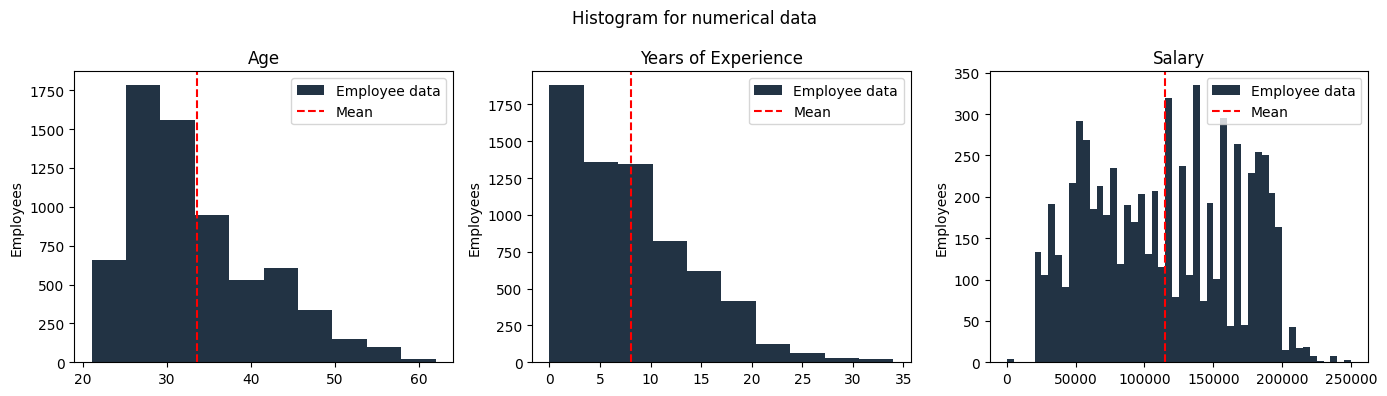

In [780]:
# Histogram for numeric variables
c=['Age', 'Years of Experience', 'Salary'] # set column names
#set up plot for 3 charts
fig, axs = plt.subplots(1,3, figsize=(14,4)) # 1 row, 3 columns
fig.suptitle('Histogram for numerical data',fontsize=12)
#set grid coordinates for subplots
#rows=[0,0,0]
cols=[0,1,2]
b=[10,10,50]
#loop through numeric data and draw histograms + indicate mean
for i in range(len(c)): #loop as many times as the number of elements in the variable 'c' storing column names
    mean = df[c[i]].mean() #get mean 
    # generate subplots and place them on predefined coordinates
    axs[cols[i]].hist(df[c[i]],bins=b[i],label="Employee data", color='#223344')
    axs[cols[i]].set_title(c[i])
    axs[cols[i]].axvline(mean, color="red", ls="--", label="Mean")
    axs[cols[i]].set_ylabel('Employees')  # Set y-axis label
    axs[cols[i]].legend()


plt.tight_layout() #keep the text from overlapping
plt.show()

# Ref get mean (ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)
# Ref matplotlib histograms (ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
# Draw median (ref: https://python-graph-gallery.com/basic-histogram-in-matplotlib/)
# Arranging multiple subplots (ref: https://matplotlib.org/stable/users/explain/axes/arranging_axes.html)

#### Analysis of the histograms of numeric variables

+ **Age:** There is one peak on the graph, indicating that this is an unimodal histogram. With the peak showing left from the mean and most of the data tailing to the right, the histogram is right-skewed and shows clustering close to the lower age groups which in the context of the data means that the younger population is over-represented in the sample. The minimum age is 21, and the majority of individuals are likely in the younger age range.
Based on the shape a Gamma Distribution could be suitable to model the data.

+ **Years of Experience:** For the obvious reasons (Experience accumulates with age.) this histogram is quite similar to the 'Age' histogram discussed above, however it appears much more right-skewed compared with 'Age'. Clustering around lower values indicates that the majority of employees likely have fewer years of experience and there is a significant number of entry-level employees indicated by the peak around the lower end of the graph close to 0 year experience. 
Could use a Gamma distribution however, the shape of the histogram would suggest a Pareto or possibly an exponential distribution model.

+ **Salary:** The histogram is generated with more bins to be able to better see the shape of the data, it appears to be an unimodal histogram, vaguely resembling a bell shape.
A Normal Distribution model may be suitable to model the data.

###### A Complete Guide to Histograms (ref:https://chartio.com/learn/charts/histogram-complete-guide/)<br> Probability Distributions (ref: https://datascienceinpractice.github.io/tutorials/10-Distributions.html)<br> NumPy Random Generator (Ref: https://numpy.org/doc/stable/reference/random/generator.html)

#### Correlation of numeric data

Correlation measures the extent of a linear relationship between two variables. The correlation function (pandas.DataFrame.corr) returns the correlation coefficient (r) which is a numerical measure that measures the strength and direction of a linear relationship between two quantitative variables. The value ranges from -1 to 1 indicating the strength and direction of the relationship, with 0 representing no relationship at all. <br>
To visualize correlation, seaborn's heatmap plot will be utilised, which plots a color-encoded matrix representing the strength of the correlations with darker colour.

###### Correlation (ref: https://www.jmp.com/en_au/statistics-knowledge-portal/what-is-correlation.html) <br> Linear Relationships – Correlation (ref: https://bolt.mph.ufl.edu/6050-6052/unit-1/case-q-q/linear-relationships/)<br> seaborn.heatmap (ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

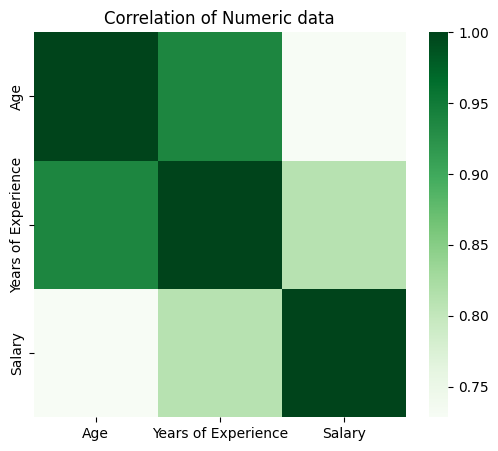

,Age,Years of Experience,Salary
Age,1.000000,0.937609,0.728343
Years of Experience,0.937609,1.000000,0.810942
Salary,0.728343,0.810942,1.000000


In [781]:
# 
plotCorr=df[['Age','Years of Experience','Salary']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(plotCorr, cmap='Greens') # render heatmap (ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html)
plt.title("Correlation of Numeric data")
plt.show()
plotCorr

#### Analysis of correlations

All three numeric variable shows *strong* (0.7-0.9) to near *perfect* (1) positive correlations. <br>The relatively weakest correlation is between Age and Salary (0.73), while the strongest and nearly perfect correlation is unsurprisingly between Years of Experience and Age (0.94). <br>Apparently the salary amount is slightly more determined by Years of Experience (0.81) than Age (0.73).

###### User's guide to correlation coefficients (ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/) <br> Dancey and Reidy's (2004) correlation categorization. (ref:https://www.researchgate.net/figure/Dancey-and-Reidys-2004-correlation-categorization_tbl5_338938434)

#### Visualizing categorical data from the dataset

Important characteristics of categorical variables that there is no hierarchical way of ordering these categories, and they represent qualitative values; they cannot be represented on a numeric scale. Hence, a histogram is not appropriate to analyse categorical data.<br>
A bar chart presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. In the context of categorical data, this value is the frequency counts to the categories. A bar graph shows comparisons among discrete categories.

###### Bar Chart (ref: https://en.wikipedia.org/wiki/Bar_chart) <br> 8 easy plotting categorical variables with seaborn for Pandas Dataframe (ref: https://medium.com/@DemetrioCN/8-easy-plotting-categorical-variables-with-seaborn-for-pandas-dataframe-15bcdc10e99a) <br> Bar Chart (ref: https://www.jmp.com/en_nl/statistics-knowledge-portal/exploratory-data-analysis/bar-chart.html#:~:text=Bar%20charts%20make%20sense%20for,responses%20have%20a%20defined%20order.)

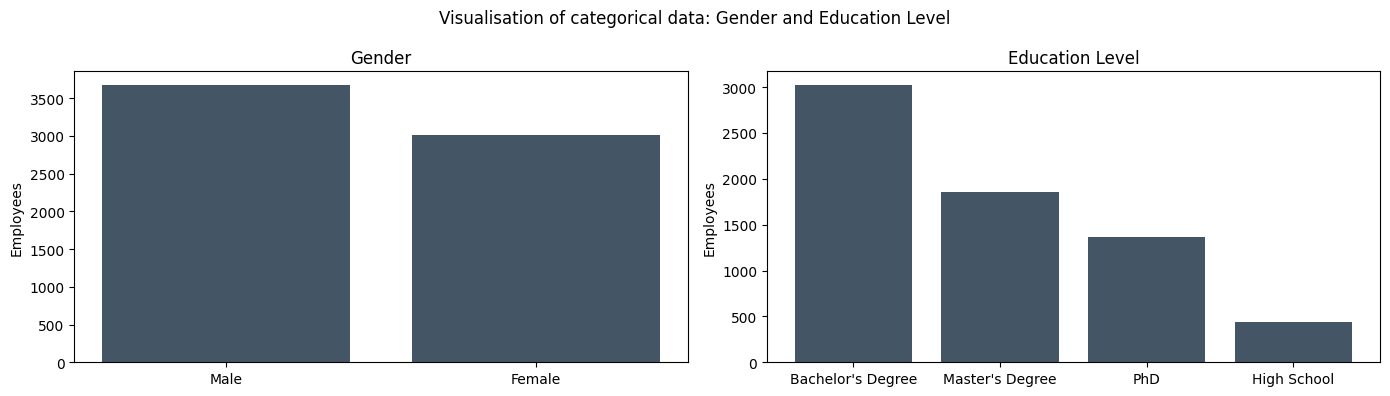

In [782]:
# Bar plots for categorical variables
c=['Gender', 'Education Level', 'Job Title'] # set column names
#set up plot for 2 charts
fig, axs = plt.subplots(1,2, figsize=(14,4)) # one row, 2 columns
fig.suptitle('Visualisation of categorical data: Gender and Education Level',fontsize=12)
#set grid coordinates for subplots
cols=[0,1]
#loop through data and draw histograms
for i in range(2):
    # generate subplots and place them on predefined coordinates
    axs[cols[i]].bar(df[c[i]].value_counts().index, df[c[i]].value_counts(), color='#445566')
    axs[cols[i]].set_title(c[i])
    axs[cols[i]].set_ylabel('Employees')  # Set y-axis label

plt.tight_layout() #keep the text from overlapping
plt.show()

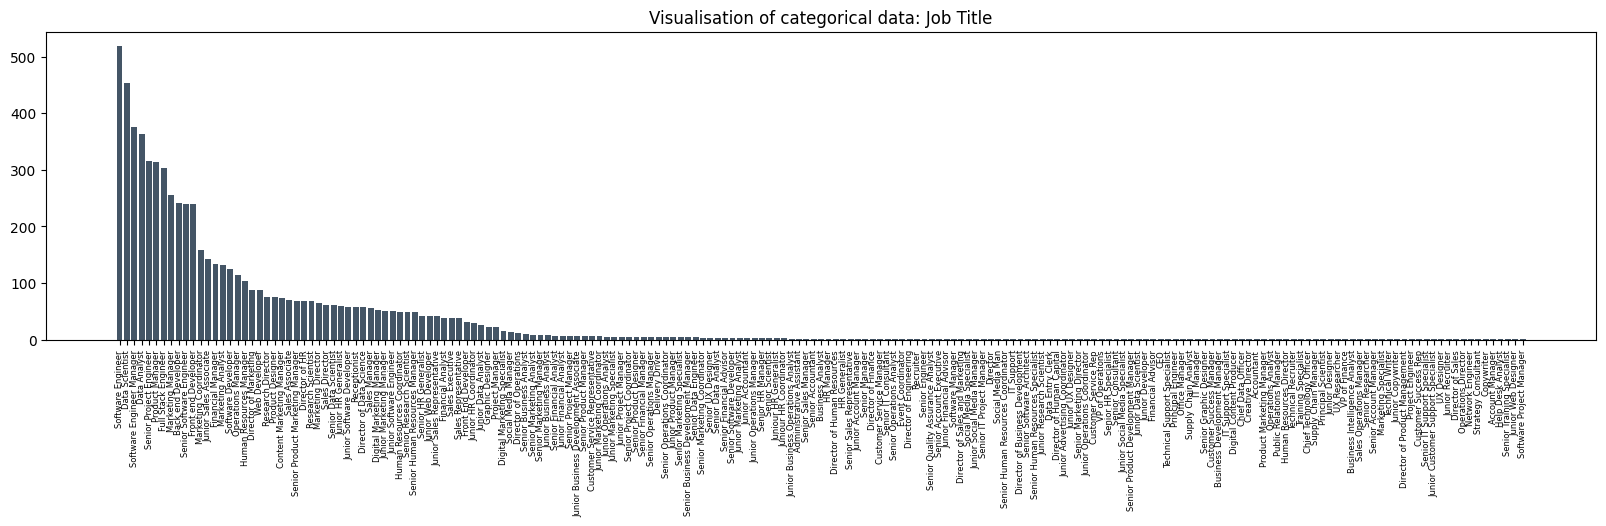

In [783]:
# generating separate plot for Job Title due to the large number of categories.
fig, axs = plt.subplots(figsize=(20,4))
plotme=df['Job Title']
plt.bar(plotme.value_counts().index, plotme.value_counts(), color='#445566')
plt.xticks(rotation=90, fontsize=6) # rotate axis labels (ref: https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels)
plt.title('Visualisation of categorical data: Job Title',fontsize=12)
plt.show()

### Analysis of the bar charts of categorical data

+ **Gender:** The bar chart shows three categories, with the "Male" category being the most prominent. With only Male and Female categories a Bernoulli distribution would be sufficient but with the third category present, a binominal distribution will be required to model this data.

+ **Education Level:** There are four categories with 'Bachelor's Degree' the highest and 'High School' the lowest. Binominal distribution could be the most likely model for this variable.

+ **Job Title:** This variable has 191 distinct categories, some of them self-explanatory but many of them are difficult to interpret without detailed knowledge about the company's specific roles. For these reasons this variable is not likely to help with a deeper understanding of the relationships with other variables in the data.

###### (ref:https://www.unf.edu/~cwinton/html/cop4300/s09/class.notes/DiscreteDist.pdf)

### Investigating relationships between variables

The Pairplot enables the analysis of pairwise relationships between variables within a dataset, offering a visual summary of a large amount of data within a single figure. This is particularly helpful during the initial exploration of a dataset.
<br>
Seaborn's Pairplot, part of the Python Seaborn library, is used to create a grid of scatter plots and histograms or Kerneel Density Estiamtions (KDE) if hue is given, visualizing the pairwise relationships in a dataset. The comparison is made easier by having all pairs of measurements plotted side by side using subplots. Where the same measurement paired, a histogram or KDE is drawn. <br>

A KDE, instead of using bins to count observations like histograms, smooths the observations with a Gaussian kernel, producing a continuous density estimate, approximating the underlying probability density function. 

A scatter plot, which is the default visualization in Seaborn's pairplots, uses dots to represent values of two numeric variables, with each dot indicating the values of an individual data point on the horizontal and vertical axis. It is used to visualize relationships between variables.<br>

From the previous Correlation Analysis, we already established that the Salary amount is strongly affected by Years of Experience (0.81) and Age (0.73). Seaborn's pairplot allows for a similar comparison, but it also can provide context using a categorical variable such as 'Gender' or 'Education Level' with the hue function that colours the data according to the category values, providing further insight.

###### Seaborn Pairplot: Enhance Your Data Understanding with a Single Plot (ref: https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22) <br> seaborn.pairplot (ref: https://seaborn.pydata.org/generated/seaborn.pairplot.html) <br> A Complete Guide to Scatter Plots (ref: https://chartio.com/learn/charts/what-is-a-scatter-plot/) <br> Kernel Density Estimation (KDE) (ref: https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial) <br> Creating Pair Plots in Seaborn with sns pairplot (ref: https://datagy.io/seaborn-pairplot/)

The first categorical variable to examine is "Gender". The pairplots will provide insight weather the salary values in this sample are evenly distributed among the genders or there is evidence of gender based wage disparity. The 'gender pay gap' is a globally recognized phenomenon that refers to the average difference in remuneration between men and women in the workforce. It is influenced by various factors, including occupational segregation, differences in education and experience, and societal factors.

###### Gender pay gap (ref: https://en.wikipedia.org/wiki/Gender_pay_gap)

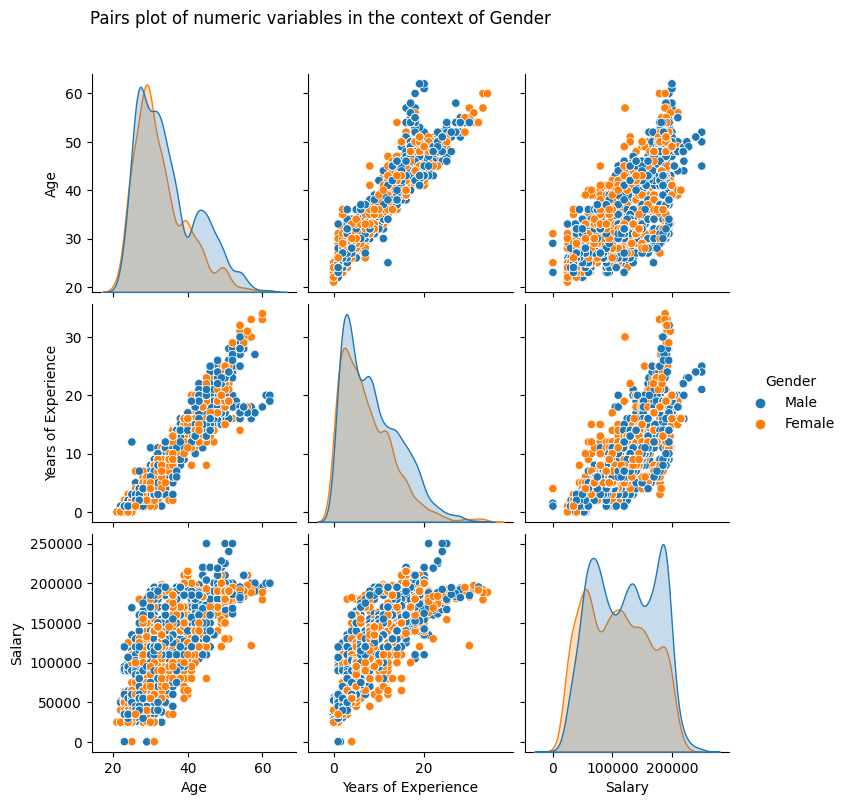

In [784]:
# Examine the data in the context of Gender
# Draw pairplots in with 'Gender' categories distinguished with colour.
context='Gender'
sns.pairplot(df, hue=context, height=2.5)
plt.title(f"Pairs plot of numeric variables in the context of {context}", x=-1,y=3.3)
plt.show()

#### Analysis of pairplots in the context of the 'Gender' category

1. **Age:** 
    - a) Age on Age comparison in the context of Gender provides us with a KDE of the distribution of the Genders. It was already discussed in the previous Age histogram that most of the employees are in their twenties and thirties. It appears that the genders are evenly distributed in the more populous demographic however, as the age closing to the 50 mark, the number of male employees are visibly higher. Furthermore, it also reveals that the difference in the total number of male and female employees demonstrated in the bar charts previously is mainly due to the higher number of middle-aged men on the payroll. As Age and Salaries have a strong (0.73) positive correlation, this could be a factor in gender differences.
    - b) The scatter plot of Age vs Years of Experience clearly demonstrates the previously discussed almost perfect (0.74) positive linear relationship between the two variables, but it also reveals that the older female employees have more Years of Experience compared with their male counterparts. Since Years of Experience has a stronger (0.81) positive correlation with Salary compared with Age (0.74) this observation counters the suggestion that Age is a defining factor in lower Female salary.
    - c) On Age vs Salary the scatter plot shows signs of wage disparity with male employees getting the highest salaries regardless of their age the with an apparent glass ceiling for women at around 200k annual salary. This observation also demonstrates that the strong positive correlations of Age on Salary does not affect Male and Female employees equally.
2. **Years of Experience:** 
    - a) Years of experience vs Age confirms the already discussed points in section 1.a) above
    - b) Years on Experience plotted on itself shows that there are more male employees than female which is already established, and that the male employees in general have a little more Years of Experience. This could be explained with the previously noted discrepancy in employee demographic (higher number of older male employees) and the strong correlation between Age and Years of Experience.
    - c) Years of Experience vs Salary reveals that while the most experienced employees are female, the highest salaries are paid to male employees. The result is counterintuitive since the highest positive correlation has been already demonstrated between Salary and Years of Experience. This phenomenon can't be explained without analysing the data in other context as well such as Education Level or Job Title.
+ **Salary:** 
    - a) Both Salary vs Age and Salary vs Years of Experience shows the previously discussed positive linear relationships but also reveals the high earning male employees clearly separated from the trend.
    - b) Salary on Salary confirms the higher number of male employees compared with female as expected, however it also reveals that the female employees start with a slightly lower salary, there is a moderate peak at the medium salary value and continue to be represented less and less at the higher salary ranges. Meanwhile, the number of male employees peak at a higher entry-level salary, peak once more in around the middle (but higher than the female employees) and peak highest at the highest salary range.

The results indicate a wage disparity between the salaries of male and female employees suggesting that the previously demonstrated positive linear correlations between numeric variables (Age and Years of Experience) affecting the salary does not have equal affect on the different genders. <br>
However, it must be noted that without the context of other variables such as 'Education Level', there is insufficient evidence to make the connection at this point of the analysis.<br>

For additional context another set of pairplots generated to provide comparisons in the context of Education Levels. Higher education levels expected to correlate with higher salaries which would potentially make the gender pay gap explanation weaker.

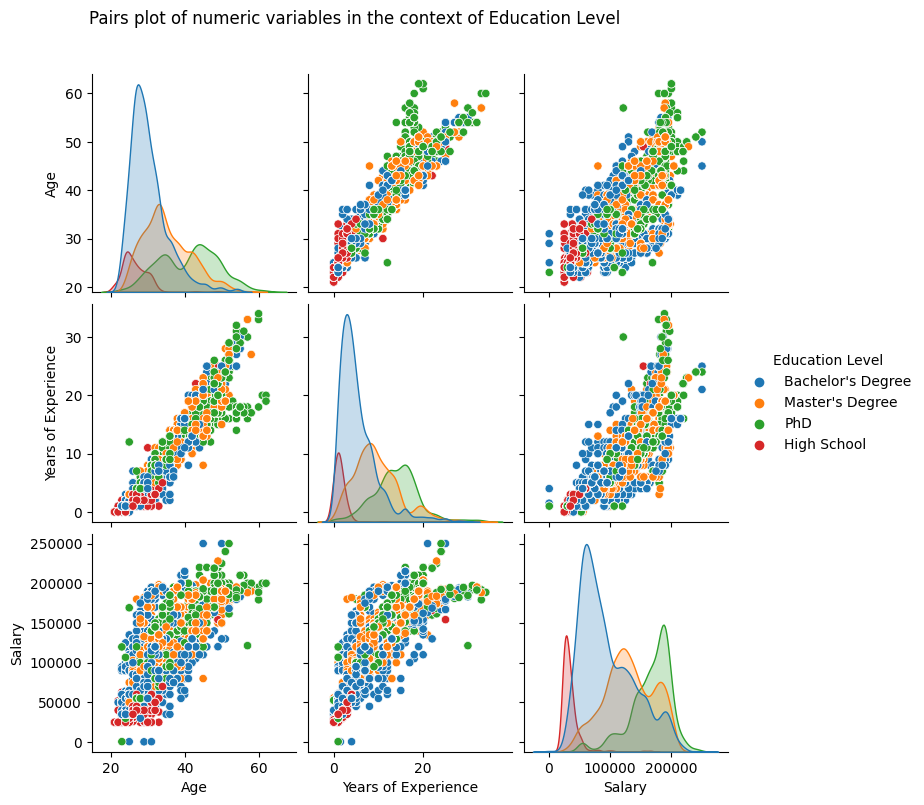

In [785]:
# Pairplots with Education Level
context='Education Level'
sns.pairplot(df, hue=context, height=2.5)
plt.title(f"Pairs plot of numeric variables in the context of {context}", x=-0.83,y=3.3)
plt.show()

#### Analysis of pairplots in the context of the 'Education Level' category

1. **Age:** 
    - a) The Age on Age histogram, shows that the majority of the employees have Bachelor's Degrees clustering around the younger age range along with High School education, enmployee population with Masters and PhD are higher at a slightly older age with PhD having two peaks in the before 40 and after 40 population.
    - b) Age on Years of Experience shows once again the same linear relation discussed before. The number of employees with PhD  is increasing toward the higher age and experience group.
    - c) Age on Salary plot in the context of education is not showing the same disparity as it did with gender. The highest earners (200k+) can have aither Bachelor, Masters or PhD degrees. The mostly younger, High School educated population is massing around the lowest salaries but otherwisew the rest of the salaries are distributed relatively evenly although with a bias toward Masters and PhD in the older and better paid population.
2. **Years of Experience:** 
    - a) Years of Experience on Age doesn't provide furhter insight other than their already established strong positive linear relationsip.
    - b) The histogram on Years of Experience in the context of Education Level looks quite similar to the Age on Age subplot, the younger and the less educated employee population has the least experience while Masters and PhD employees have the most.
    - c) The scatterplot on Years of Experience vs Salary is very similar to the Age vs Salary subplot which is expected as their linear correlation is very strong. Less experienced people getting lower pay but from Educational point of view there is no obvious clustering.
+ **Salary:** 
    - a) Salary on Age and Salary on Years of Experience repeats the already discussed reuslts
    - b) The histogram of Salary on Salary in the context of Education Level confirms that the High School educated employee population gets the lowest salary wioth a sharp decline suggesting that almost none of them earn over 100k, while employees with Bachelor's degrees have a peak at the lower salary range round 80k but the curve has a long tail indicating that a Bachelor's degree doesn't limit the maximum salary, in fact the highest earners in the company are with Bachelor's degrees.Employees with Master's massing around the mid range and there is another peak close to the 200k mark, while PhD employees are massing at the highest salary range but the curve has a long front end possibly indicating part time employees but without detailed knowledge about the company it is not possible to ascertain.

The results from the pairplots in the context of Education Level only confirms that High School education limits the achievable salary. However, with regards to other categories, the connection between Education Level and Salaries is not as strong as expected. The result was unable to weaken the gender pay gap argument. 

###### Gender pay gap (ref: https://en.wikipedia.org/wiki/Gender_pay_gap)

#### Analysis of the effects of gender on salary in the context of Education Levels with boxplots

It was demonstrated that while Gender has apparent affect on the Salary, the same cannot be stated about the categories within Level of Education. To illustrate gender-based differences in salaries, the Level of Education is grouped by Gender on the Salary axis using Seaborn's categorical plot with box plots.<br>
Box plots are effective tools for visualizing the distribution of numeric data, particularly when conducting comparisons across multiple groups. They offer a high-level overview of essential statistical characteristics such as symmetry, skewness, variance, and the presence of outliers. Boxplots offer a good visual representation on the central tendencies within the data, enabling efficient comparisons between different groups, based on five attributes; minimum, first quartile, median, third quartile and maximum. The box represents the central 50% of the data with a line representing the median value, while the whiskers cover the remaining range of the data. Outliers are plotted outside the whiskers range as individual points. <br>

<img src="https://api.www.labxchange.org/api/v1/xblocks/lb:LabXchange:d8863c77:html:1/storage/211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png" alt="Alt text" width="500" height="250"/>

###### Understanding Boxplots (ref: https://builtin.com/data-science/boxplot) <br> A Complete Guide to Box Plots (Ref: ˙ref: https://chartio.com/learn/charts/box-plot-complete-guide/) <br> Visualizing categorical data (ref: https://seaborn.pydata.org/tutorial/categorical.html) <br> How to interpret box plots (ref: https://www.labxchange.org/library/pathway/lx-pathway:a589f0bb-21ff-47bd-98ac-bd9cc96e299e/items/lb:LabXchange:d8863c77:html:1/59955)

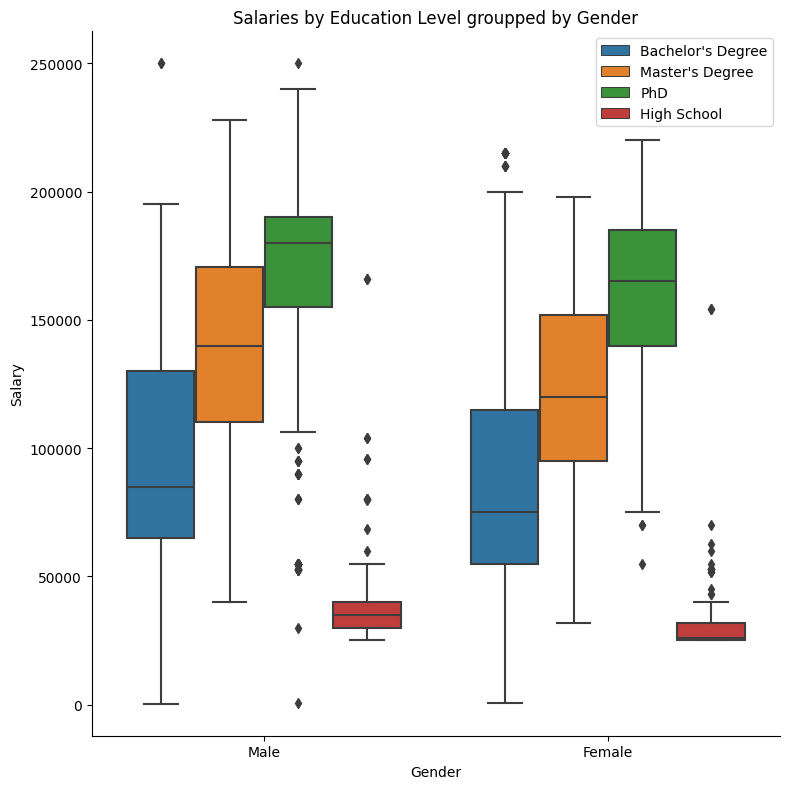

In [786]:
# Visualizing categorical data (ref: https://seaborn.pydata.org/tutorial/categorical.html )
# categorical plot (ref: https://seaborn.pydata.org/tutorial/categorical.html)
sns.catplot(data=df, x="Gender", y="Salary", hue='Education Level', height=8, kind='box',legend=False)
plt.title("Salaries by Education Level groupped by Gender")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#### Analysis of Education Level on the axis of Salary grouped by Gender with box plots.

The bulk of the employees (the central 50%) and also the median mark appears higher in the Male group compared with the Female group across all Education Levels. There is no category where female employees have the advantage. The box plot also reveals a clear progression in salaries from lower to higher Education level but only within the gender group. Overall the male group salaries typically start higher and end higher in all categories, while there is a visible limit or ceiling in regard to the highest possible salary for female employees. The term glass ceiling refers to a metaphorical invisible barrier that prevents certain individuals from being promoted to managerial- and executive-level positions within an organization or industry. 

###### The Glass Ceiling: Definition, History, Effects, and Examples (Ref: https://www.investopedia.com/terms/g/glass-ceiling.asp#:~:text=The%20glass%20ceiling%20is%20a,at%20a%201978%20Women's%20Exposition.)

#### Comparing genders side by side

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable. A split violin plot can show the distribution of salaries across the various Education Levels with the two genders compared side by side.

<img src="https://api.www.labxchange.org/api/v1/xblocks/lb:LabXchange:46f64d7a:html:1/storage/28__violin-plot-11626365603605-77f9e7acf0e79c553ec92a044b91b6b1.png" alt="Alt text" width="350" height="300"/>

###### How to Interpret Violin Plots (ref: https://www.labxchange.org/library/items/lb:LabXchange:46f64d7a:html:1) <br> Violin Plots 101: Visualizing Distribution and Probability Density (ref: https://mode.com/blog/violin-plot-examples/#:~:text=What%20is%20a%20violin%20plot%3F,the%20density%20of%20each%20variable.)

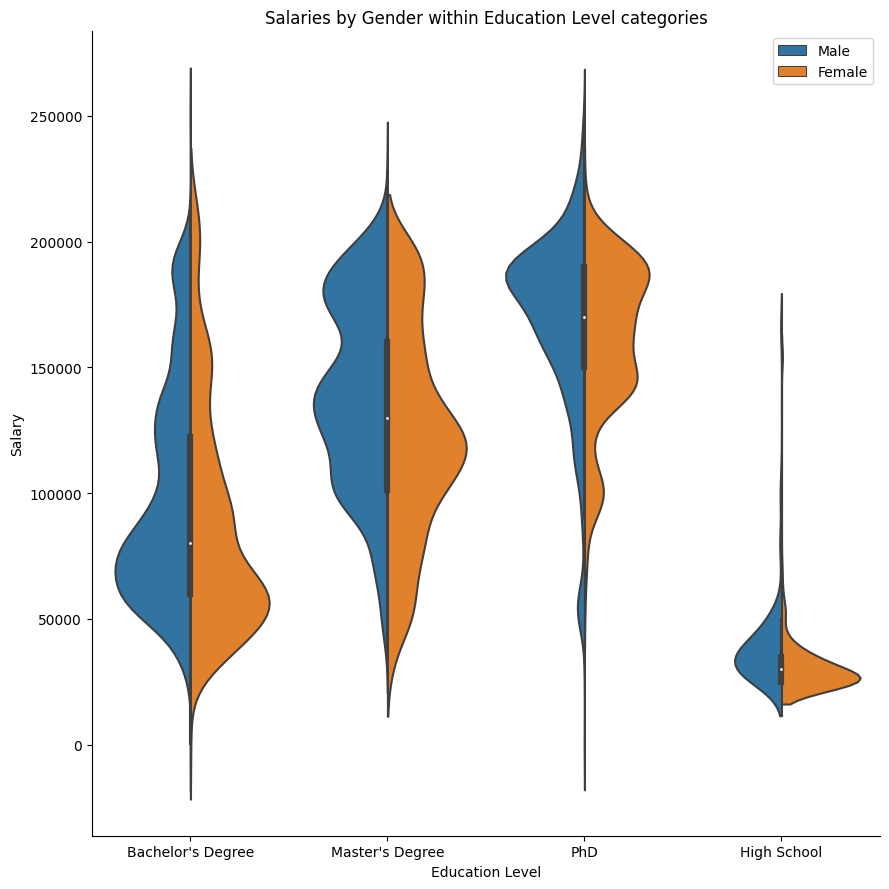

In [787]:
###### Resize image in Markdown (ref: https://stackoverflow.com/questions/14675913/changing-image-size-in-markdown)

# drop 'Other' from Gender values to be able to render split violin plot
# Split violin plot (ref: https://seaborn.pydata.org/tutorial/categorical.html), (ref: https://mode.com/blog/violin-plot-examples/#:~:text=What%20is%20a%20violin%20plot%3F,the%20density%20of%20each%20variable)
sns.catplot(data=df, x="Education Level", y="Salary", hue='Gender', height=9, kind='violin', split=True, legend=False, inner='box')
plt.title("Salaries by Gender within Education Level categories")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Creating synthetic data for the Age variable using random distribution model

fit random distributions to data

ref: https://datascienceinpractice.github.io/tutorials/10-Distributions.html<br>
Gamma https://medium.com/geekculture/fitting-time-to-event-to-a-gamma-distribution-model-using-python-1c76cbc7a6a#:~:text=Fit%20Data%20to%20Gamma,observations%20given%20the%20gamma%20distribution.

In [788]:
df['Age'].describe()

count    6684.000000
mean       33.610563
std         7.595994
min        21.000000
25%        28.000000
50%        32.000000
75%        38.000000
max        62.000000
Name: Age, dtype: float64

         Age_synth
count  6684.000000
mean     32.480999
std       6.928944
min      21.000000
25%      27.000000
50%      31.000000
75%      36.000000
max      62.000000


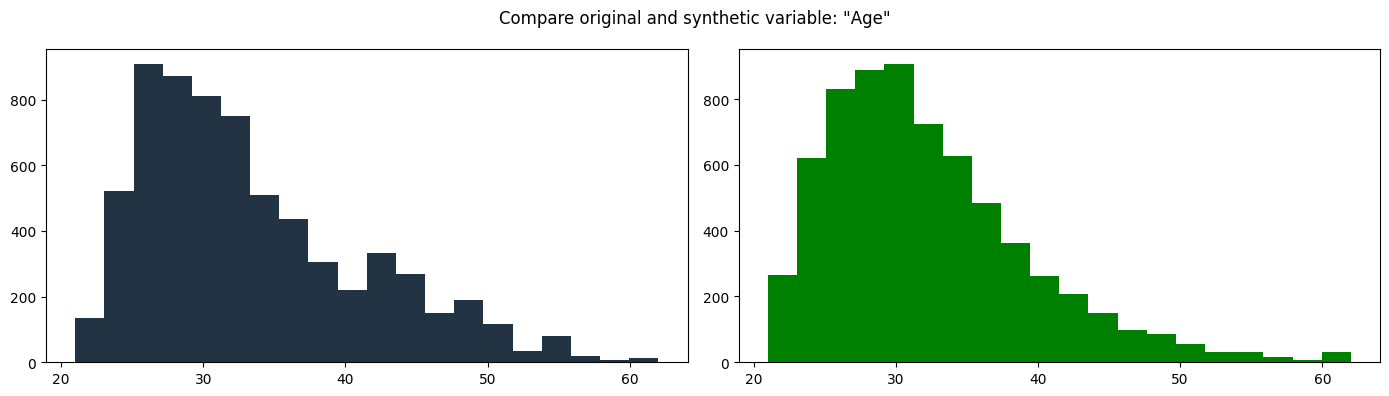

In [789]:
# Simulation of 'Age' variable
size=df['Age'].count()
# Find varaibles for random gamma to get a similar shape with trial and error.
age_model = np.random.gamma(shape=3, scale=4, size=size) ##NumPy.randmom.gamma (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)

#Convert gamma results to employee age data
age_data = np.clip(age_model+df['Age'].min(),0,df['Age'].max()) # np.clip(age_model+21,0,62) clip at 62

# Create a DataFrame with a column 'Age_synth'
df_synth = pd.DataFrame({'Age_synth': age_data})
df_synth['Age_synth'] = df_synth['Age_synth'].astype(int) #assign datatype (ref:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)
#df_synth['Age_synth'] = df_synth['Age_synth'].replace(

# Display the summary statistics
print(df_synth.describe())

#df_synth.loc[df_synth['Age_synth']>62,'Age_synth']=22#df_synth['Age_synth'].mean() #Replace Values of Columns by Using DataFrame.loc[] (ref:https://sparkbyexamples.com/pandas/pandas-replace-values-based-on-condition/#:~:text=You%20can%20replace%20values%20of,the%20values%20of%20pandas%20DataFrame.
#over=df_synth.loc[df_synth['Age_synth']>62]#loc (ref:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)
#over


#set up plot for 2 charts-------------------------------------------
fig, axs = plt.subplots(1,2, figsize=(14,4)) # 1 row, 3 columns
fig.suptitle('Compare original and synthetic variable: "Age"',fontsize=12)
#set grid coordinates for subplots

axs[1].hist(df_synth['Age_synth'],bins=20,label="Synthetic", color='g')
axs[0].hist(df['Age'],bins=20,label="Original", color='#223344')

plt.tight_layout() #keep the text from overlapping
plt.show()





In [790]:
df['Years of Experience'].describe()

count    6684.000000
mean        8.077723
std         6.029305
min         0.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        34.000000
Name: Years of Experience, dtype: float64

         Age_synth  Years of Experience_synth
count  6684.000000                6684.000000
mean     32.480999                   7.948833
std       6.928944                   5.881727
min      21.000000                   0.000000
25%      27.000000                   4.000000
50%      31.000000                   7.000000
75%      36.000000                  11.000000
max      62.000000                  34.000000


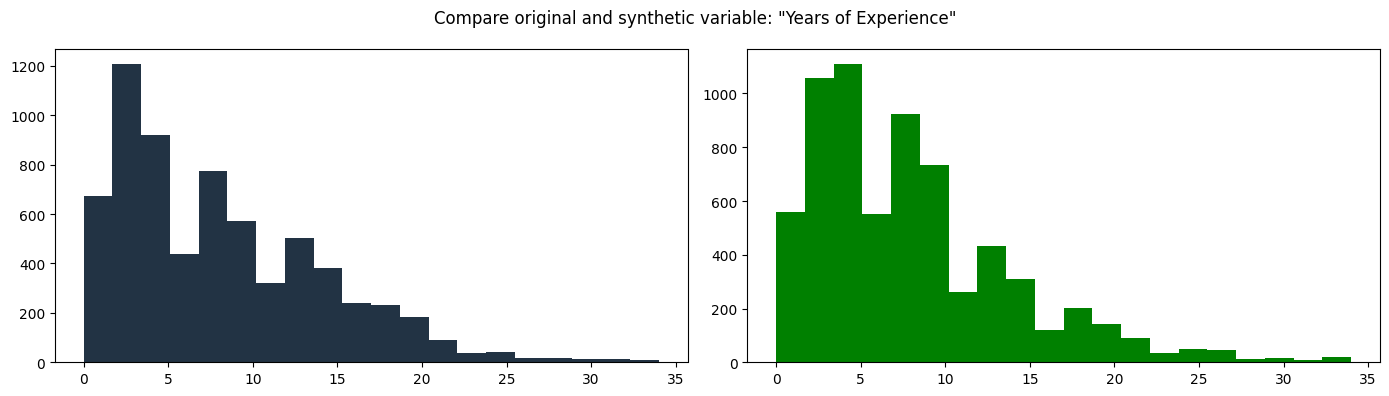

In [791]:
# Simulation of 'Years of Experience' variable
size=df['Age'].count()
# Find varaibles for random gamma to get a similar shape with trial and error.
yexp_model = np.random.gamma(shape=2, scale=4.2, size=size) #NumPy.randmom.gamma (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)

#clip synth data to match original variable's min and max
yexp_data = np.clip(yexp_model+df['Years of Experience'].min(),0,df['Years of Experience'].max())

# Create a DataFrame with a column 'Age_synth'
df_synth['Years of Experience_synth']  = yexp_data
df_synth['Years of Experience_synth'] = df_synth['Years of Experience_synth'].astype(int) #assign datatype (ref:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)
#df_synth['Age_synth'] = df_synth['Age_synth'].replace(

# Display the summary statistics
print(df_synth.describe())


#set up plot for 2 charts-------------------------------------------
fig, axs = plt.subplots(1,2, figsize=(14,4)) # 1 row, 3 columns
fig.suptitle('Compare original and synthetic variable: "Years of Experience"',fontsize=12)
#set grid coordinates for subplots
#rows=[0,0,0]

axs[1].hist(df_synth['Years of Experience_synth'],bins=20,label="Synthetic", color='g')
axs[0].hist(df['Years of Experience'],bins=20,label="Original", color='#223344')

plt.tight_layout() #keep the text from overlapping
plt.show()

In [792]:
df_synth.describe()

,Age_synth,Years of Experience_synth
count,6684.000000,6684.000000
mean,32.480999,7.948833
std,6.928944,5.881727
min,21.000000,0.000000
25%,27.000000,4.000000
50%,31.000000,7.000000
75%,36.000000,11.000000
max,62.000000,34.000000


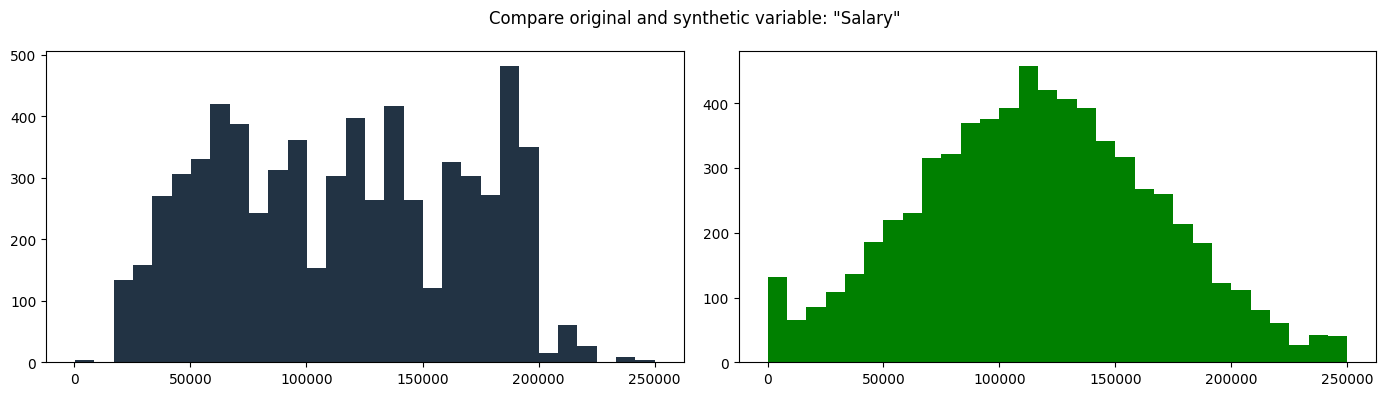

               Age  Years of Experience         Salary
count  6684.000000          6684.000000    6684.000000
mean     33.610563             8.077723  115307.175194
std       7.595994             6.029305   52806.810881
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000
         Age_synth  Years of Experience_synth   Salary_synth
count  6684.000000                6684.000000    6684.000000
mean     32.480999                   7.948833  115885.570766
std       6.928944                   5.881727   51535.694135
min      21.000000                   0.000000       0.000000
25%      27.000000                   4.000000   80270.250000
50%      31.000000                   7.000000  115505.000000
75%      36.000000                  11.000000  151493.250000
max      62.00000

In [793]:
# Simulation of 'Salary' variable

mu, sigma = df['Salary'].mean(), df['Salary'].std()
samples = df['Salary'].count()

salary_model = np.random.normal(mu, sigma, samples) #NumPy.randmom.gamma (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)

#clip synth data to match original variable's min and max
salary_data = np.clip(salary_model+df['Salary'].min(),0,df['Salary'].max())

# Create a DataFrame with a column 'Age_synth'
df_synth['Salary_synth']  = salary_data
df_synth['Salary_synth'] = df_synth['Salary_synth'].astype(int) #assign datatype (ref:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)
#df_synth['Age_synth'] = df_synth['Age_synth'].replace(

# Display the summary statistics



#set up plot for 2 charts-------------------------------------------
fig, axs = plt.subplots(1,2, figsize=(14,4)) # 1 row, 3 columns
fig.suptitle('Compare original and synthetic variable: "Salary"',fontsize=12)
#set grid coordinates for subplots
#rows=[0,0,0]

axs[1].hist(df_synth['Salary_synth'],bins=30,label="Synthetic", color='g')
axs[0].hist(df['Salary'],bins=30,label="Original", color='#223344')

plt.tight_layout() #keep the text from overlapping
plt.show()
print(df.describe())
print(df_synth.describe())

In [794]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0


(array([   9.,  114.,  455., 1277., 1916., 1652.,  904.,  298.,   53.,
           6.]),
 array([-72417.71422519, -33353.35832636,   5710.99757247,  44775.3534713 ,
         83839.70937013, 122904.06526896, 161968.42116779, 201032.77706662,
        240097.13296545, 279161.48886428, 318225.84476311]),
 <BarContainer object of 10 artists>)

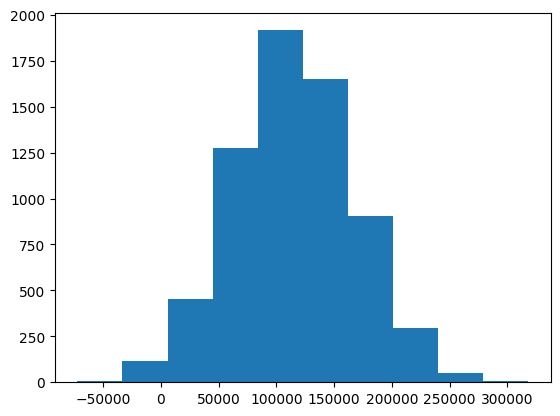

In [795]:
# salary with normal distribution
# Number of samples
samples = df['Salary'].count()
# Generate random samples from a normal distribution
mu, sigma = df['Salary'].mean(), df['Salary'].std()
rng = np.random.normal(mu, sigma, samples)
plt.hist(rng)

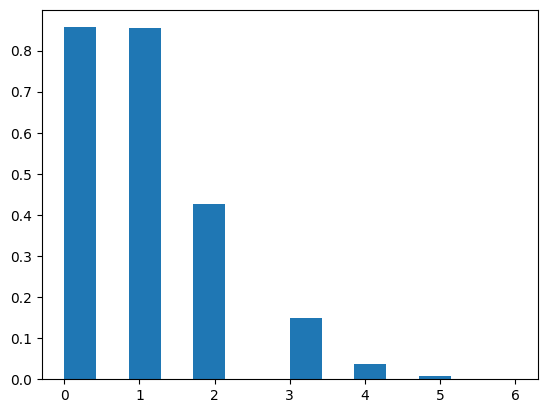

In [796]:
#plt.hist(df['Education Level'])
# Poisson for Education Level
s = np.random.poisson(1, 7000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()